In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import dtale
import sweetviz as sv
from ydata_profiling import ProfileReport

In [5]:
data = pd.read_csv('data/wine_cleared.zip')

data.describe()
data.head()


# Определяем параметры архивирования — метод сжатия, имя файла в архиве
# compression_opts = dict(method='zip', archive_name='out.csv') 
# data.to_csv('data/out.zip', index=False, compression=compression_opts)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)

In [7]:
# добавляем колонку year с годом производства вина
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

Вы можете создать новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [8]:
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

### Задание 2.1
1 point possible (graded)
Выберите из списка две самых популярных (помимо США) страны, производящих вино.

France                    22093
Italy                     19540

In [9]:
data['country'].value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


### Задание 2.2
2 points possible (graded)
Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

В ответ впишите результат выполнения кода data['is_france'].sum():
22093

В ответ впишите результат выполнения кода data['is_italy'].sum():
19540

In [10]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

In [11]:
data['is_france'].sum()

22093

In [12]:
data['is_italy'].sum()

19540

### Задание 2.3
1 point possible (graded)
Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

В ответ впишите результат выполнения кода data['old_wine'].sum():

39781.0

In [13]:
#data['year'] = data['year'].fillna(-1)
data['old_wine'] = data['year'].apply(lambda x: np.nan if pd.isna(x) else (1 if x < str(2010) else 0))

In [14]:
data['old_wine'].sum()

39781.0

### Задание 2.7 (Самопроверка)
0 points possible (ungraded)
Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.

Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

Ответом на это задание является получившееся регулярное выражение и код преобразования.



In [15]:
data.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'taster_name', 'taster_twitter_handle',
       'title', 'variety', 'winery', 'price_round', 'year', 'is_usa',
       'is_france', 'is_italy', 'old_wine'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
 13  price_round            129971 non-null  int32  
 14  year                   125362 non-nu

In [17]:
# Регулярное выражение для нахождения первой пары скобок справа
regex = r'\(([^()]*(?:\([^()]*\)[^()]*)*)\)(?!.*\([^()]*\))'

# Создание нового признака locality
data['locality'] = data['title'].str.extract(regex)

In [18]:
country_population = pd.read_csv('data/country_population.zip', sep=';')

country_population

,country,population
0,China,"1,411,778,724"
1,India,"1,386,584,581"
2,US,"333,022,386"
3,Indonesia,"271,350,000"
4,Pakistan,"225,200,000"
...,...,...
236,Niue,"1,549"
237,Tokelau,"1,501"
238,Vatican City,825
239,Cocos Islands,573


### Задание 3.1
1 point possible (graded)
Каково население Италии согласно датасету country_population? Ответ вводите без пробелов и запятых.
59097904

In [19]:

italy_population = country_population.loc[country_population['country'] == 'Italy', 'population'].values[0]
italy_population

'59,097,904'

Далее сопоставим значения из датасета country_population и страной-производителем вина. На основе значений населения из country_population заполним новый признак country_population.

Используем для этого функцию для объединения датасетов join. Для объединения используем аргумент on='country', указывая столбец, по которому объединяем датафреймы:

data.join(country_population.set_index('country'), on='country')
В результате объединения получаем информацию о населении страны в каждой строке:
Итак, мы получили новый признак для нашего датасета — население страны.

In [20]:
data.join(country_population.set_index('country'), on='country')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,population
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,0.0,Etna,"59,097,904"
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0.0,Douro,"10,347,892"
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0.0,Willamette Valley,"333,022,386"
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0.0,Lake Michigan Shore,"333,022,386"
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0.0,Willamette Valley,"333,022,386"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0.0,Mosel,"83,129,285"
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,1.0,Oregon,"333,022,386"
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0.0,Alsace,"68,035,000"
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0.0,Alsace,"68,035,000"


In [21]:
# Теперь используем файл country_area.zip для информации о площади страны.
# Прочитаем файл:

country_area = pd.read_csv('data/country_area.zip', sep=';')
country_area

,country,area
0,Russia,17075400.00
1,Canada,9984670.00
2,China,9596960.00
3,US,9372610.00
4,Brazil,8547000.00
...,...,...
188,San Marino,61.00
189,Tuvalu,26.00
190,Nauru,21.00
191,Monaco,2.00


Прочитав файл, мы получили привычный нам датафрейм с полями country — название страны, area — площадь страны.

### Задание 3.2
1 point possible (graded)
Создайте новый признак area_country — площадь страны, аналогичный признаку population.

Какая площадь страны у вина под названием 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))'? Ответ вводите без пробелов, округлите до целых.

9372610

In [22]:
#Прочитав файл, мы получили привычный нам датафрейм с полями country — название страны, area — площадь страны.
data.join(country_area.set_index('country'), on='country')

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,variety,winery,price_round,year,is_usa,is_france,is_italy,old_wine,locality,area
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,White Blend,Nicosia,35,2013,0,0,1,0.0,Etna,301230.0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,Portuguese Red,Quinta dos Avidagos,15,2011,0,0,0,0.0,Douro,92391.0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Gris,Rainstorm,14,2013,1,0,0,0.0,Willamette Valley,9372610.0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.000000,Michigan,Lake Michigan Shore,Alexander Peartree,unknown,...,Riesling,St. Julian,13,2013,1,0,0,0.0,Lake Michigan Shore,9372610.0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,Pinot Noir,Sweet Cheeks,65,2012,1,0,0,0.0,Willamette Valley,9372610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.000000,Mosel,unknown,Anna Lee C. Iijima,unknown,...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),28,2013,0,0,0,0.0,Mosel,357022.0
129967,129967,US,Citation is given as much as a decade of bottl...,unknown,90,75.000000,Oregon,Oregon,Paul Gregutt,@paulgwine,...,Pinot Noir,Citation,75,2004,1,0,0,1.0,Oregon,9372610.0
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Gewürztraminer,Domaine Gresser,30,2013,0,1,0,0.0,Alsace,547030.0
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",unknown,90,32.000000,Alsace,Alsace,Roger Voss,@vossroger,...,Pinot Gris,Domaine Marcel Deiss,32,2012,0,1,0,0.0,Alsace,547030.0


In [23]:
data_extended = data.join(country_population.set_index('country'), on='country')
data_extended = data_extended.join(country_area.set_index('country'), on='country')
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129972 non-null  int64  
 1   country                129909 non-null  object 
 2   description            129972 non-null  object 
 3   designation            129972 non-null  object 
 4   points                 129972 non-null  int64  
 5   price                  129972 non-null  float64
 6   province               129909 non-null  object 
 7   region_1               129972 non-null  object 
 8   taster_name            129972 non-null  object 
 9   taster_twitter_handle  129972 non-null  object 
 10  title                  129972 non-null  object 
 11  variety                129971 non-null  object 
 12  winery                 129972 non-null  object 
 13  price_round            129972 non-null  int32  
 14  year                   125363 non-null  o

In [24]:
searched_wine_area = data_extended.loc[data_extended['title'] == 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))', 'area'].values[0]
searched_wine_area

9372610.0

### Задание 4.5
1 point possible (graded)
Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

При попытке преобразовать созданный ранее столбец year в формат datetime, вы получите ошибку OutOfBoundsDatetime, которая возникает из-за некорректного ожидаемого формата входных данных. Чтобы справиться с этой ошибкой, воспользуйтесь параметром errors в функции to_datetime библиотеки Pandas. Параметр нужно установить в значение coerce:
data['year'] = pd.to_datetime(data['year'], errors = 'coerce')
Подробнее о назначении этого параметра вы можете прочесть в документации.

98627

In [25]:
data_extended['year'] = pd.to_datetime(data_extended['year'], errors = 'coerce')

In [26]:
fixed_date = pd.to_datetime('2022-01-12', format='%Y-%m-%d', errors='coerce')
fixed_date

Timestamp('2022-01-12 00:00:00')

In [27]:
data_extended['years_diff'] = (fixed_date - data_extended['year']).dt.days


In [28]:
data_extended['years_diff'].max()

98627.0

In [29]:
import pandas as pd
import category_encoders as ce

# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


### Задание 5.1
1 point possible (graded)
Какой из признаков в обучающем наборе является порядковым?
id
size
type

Ответ:
size

### Задание 5.3 (Самопроверка)
0 points possible (ungraded)
Используйте ранее изученные методы кодирования и закодируйте признак year в датасете винных обзоров порядковым кодированием.

In [30]:
data_extended.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129972 entries, 0 to 129970
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129972 non-null  int64         
 1   country                129909 non-null  object        
 2   description            129972 non-null  object        
 3   designation            129972 non-null  object        
 4   points                 129972 non-null  int64         
 5   price                  129972 non-null  float64       
 6   province               129909 non-null  object        
 7   region_1               129972 non-null  object        
 8   taster_name            129972 non-null  object        
 9   taster_twitter_handle  129972 non-null  object        
 10  title                  129972 non-null  object        
 11  variety                129971 non-null  object        
 12  winery                 129972 non-null  object   

In [31]:
data_extended['year'].value_counts()

year
2013-01-01    15853
2012-01-01    15723
2014-01-01    15568
2011-01-01    12531
2010-01-01    12149
              ...  
1973-01-01        1
1935-01-01        1
1967-01-01        1
1969-01-01        1
1945-01-01        1
Name: count, Length: 81, dtype: int64

In [32]:

# формируем новый датасет, т.к. в предыдущем year привели к типу datetime
# исправил на merge -left, т.к. с join добавлялась лишняя строка 

# Оказалось в датасете country_population представлены 2 страны China с разным населением. Скорее всего, под индексом 102 - вместо Китая идет Гонконг
country_population.loc[102, 'country'] = 'Hong Kong'

# Проверка дубликатов в data
# duplicates_in_data = data[data.duplicated(subset=['country'], keep=False)]
# display('duplicates_in_data', duplicates_in_data)

# Проверка дубликатов в country_population
# duplicates_in_country_population = country_population[country_population.duplicated(subset=['country'], keep=False)]
# display('duplicates_in_country_population', duplicates_in_country_population)


# display('0', data.info())

data_encoded = data.merge(country_population, how='left', on='country')

# Проверка дубликатов в data
duplicates_in_data = data[data.duplicated(subset=['country'], keep=False)]

# Проверка дубликатов в country_population
duplicates_in_country_population = country_population[country_population.duplicated(subset=['country'], keep=False)]

#display('1', data_encoded.info())

data_encoded = data_encoded.merge(country_area, how='left', on='country')
#display('2', data_encoded.info())

#data_encoded = data.join(country_population.set_index('country'), on='country')
#data_encoded = data_encoded.join(country_area.set_index('country'), on='country')


# формируем столбец year_datetime из year
data_encoded['year_datetime'] = pd.to_datetime(data_encoded['year'], errors = 'coerce')

# создаем столбец years_diff, где считаем возраст вина в днях от производства до 2022-01-12
data_encoded['years_diff'] = (pd.to_datetime('2022-01-12', format='%Y-%m-%d', errors='coerce') - pd.to_datetime(data_encoded['year'], errors = 'coerce')).dt.days

display('3', data_encoded.info())

# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

data_ordered = data_encoded.copy()

#encoder = ce.OrdinalEncoder()
#data_ordered['year_encoded'] = encoder.fit_transform(data_ordered[['year']])


ord_encoder = ce.OrdinalEncoder()
data_bin = ord_encoder.fit_transform(data_ordered[['year']]) # создаем новый признак year
data_ordered = data_ordered.drop(['year'], axis=1) #убираем старый признак year, полученный из title 
data_ordered = pd.concat([data_ordered, data_bin], axis=1) # соединяем датасет с новым признаком year
data_ordered.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

'3'

None

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,is_usa,is_france,is_italy,old_wine,locality,population,area,year_datetime,years_diff,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.363389,Sicily & Sardinia,Etna,Kerin O’Keefe,@kerinokeefe,...,0,0,1,0.0,Etna,"59,097,904",301230.0,2013-01-01,3298.0,1
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.000000,Douro,unknown,Roger Voss,@vossroger,...,0,0,0,0.0,Douro,"10,347,892",92391.0,2011-01-01,4029.0,2
2,2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.000000,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,...,1,0,0,0.0,Willamette Valley,"333,022,386",9372610.0,2013-01-01,3298.0,1


### Задание 5.4
1 point possible (graded)
В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.

В ответе напишите, сколько признаков добавилось после применения кодирования.

20

In [33]:
#data_dummies = pd.get_dummies(data_ordered, columns=['taster_name'])

encoder = ce.OneHotEncoder(cols=['taster_name'], use_cat_names=True) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data_ordered['taster_name'])
data_dummies = pd.concat([data_ordered, type_bin], axis=1)

display(data_dummies.shape[1] - data_ordered.shape[1])


20

Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [34]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,type_0,type_1,type_2
0,xxs,dress,0,0,1
1,xxs,skirt,0,1,0
2,xs,dress,0,0,1
3,s,skirt,0,1,0
4,m,dress,0,0,1
5,l,shirt,0,1,1
6,s,coat,1,0,0
7,m,coat,1,0,0
8,xxl,shirt,0,1,1
9,l,dress,0,0,1


Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.



### Задание 5.5
1 point possible (graded)
Закодируйте признак country двоичным способом.

Сколько новых признаков образовалось после кодирования признака country?

6

In [37]:
import category_encoders as ce # импорт для работы с кодировщиком
# data_dummies.info()
bin_wine_encoder = ce.BinaryEncoder(cols=['country']) # указываем столбец для кодирования
country_bin = bin_wine_encoder.fit_transform(data_dummies['country'])
data_binencoded = pd.concat([data_dummies, country_bin], axis=1)

display(data_binencoded.shape[1] - data_dummies.shape[1])


6

### Задание 5.8
1 point possible (graded)
На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.

В ответе напишите, сколько признаков добавилось после применения кодирования.


taster_twitter_handle

In [39]:
data_binencoded['taster_twitter_handle'].nunique()
#16

bin_wine_2_encoder = ce.BinaryEncoder(cols=['taster_twitter_handle']) # указываем столбец для кодирования
taster_twitter__bin = bin_wine_2_encoder.fit_transform(data_binencoded['taster_twitter_handle'])
data_binencoded_2 = pd.concat([data_binencoded, taster_twitter__bin], axis=1)

display(data_binencoded_2.shape[1] - data_binencoded.shape[1])



5

### Задание 5.9 (Самопроверка)
0 points possible (ungraded)
Используйте следующий датафрейм для задания:

product - категориальный порядковый, OrdinalEncoder
payment_type - номинальный, до 15 значений, OneHotEncoder

In [42]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

#df


ord_enc = ce.OrdinalEncoder()
df_bin = ord_enc.fit_transform(df[['product']]) # создаем новый признак 
df_encoded = pd.concat([df, df_bin], axis=1) # соединяем датасет с новым признаком 

bin_enc = ce.BinaryEncoder(cols=['payment_type']) 
df_bin_2 = bin_enc.fit_transform(df_encoded['payment_type'])
data_encoded_2 = pd.concat([df_encoded, df_bin_2], axis=1)

data_encoded_2

,product,price,payment_type,product,payment_type_0,payment_type_1
0,Product1,1200,Mastercard,1,0,1
1,Product2,3600,Visa,2,1,0
2,Product3,7500,Amex,3,1,1


### Задание 6.4
1 point possible (graded)
Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.

В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

43501


43501

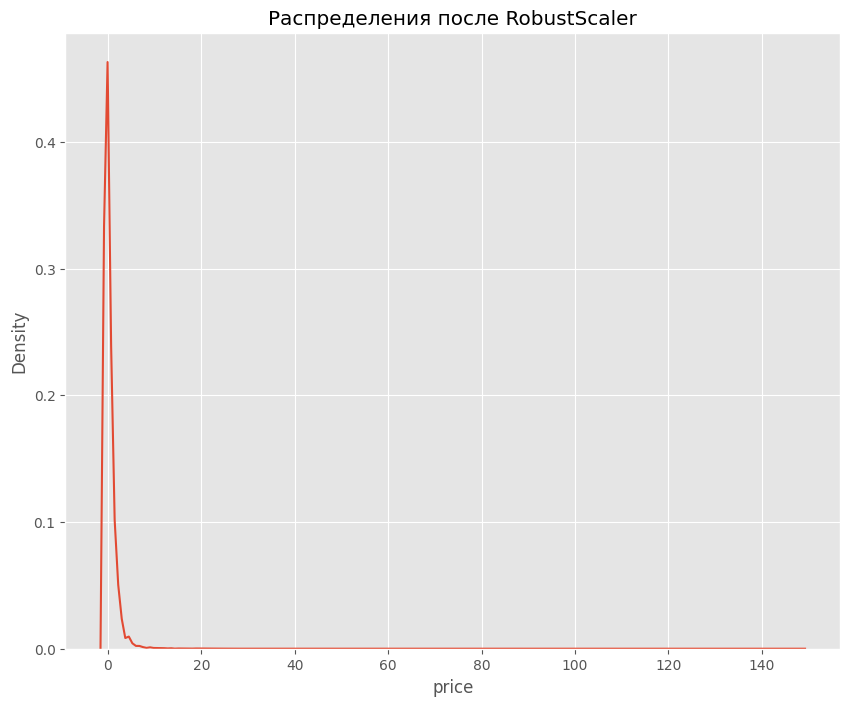

In [46]:
import numpy as np 
import pandas as pd

np.random.seed(34)

# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')


# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Преобразуем только столбец 'price'
# Для этого нужно передать его как двумерный массив с помощью .values.reshape(-1, 1)
data_binencoded_2_r = r_scaler.fit_transform(data_binencoded_2['price'].values.reshape(-1, 1))

# Преобразуем результат в датафрейм
data_binencoded_2_r = pd.DataFrame(data_binencoded_2_r, columns=['price'])


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(data_binencoded_2_r['price'], ax=ax1)

display(round(data_binencoded_2_r['price'].sum()))

### Задание 6.5
1 point possible (graded)
Стандартизируйте исходный признак price.

В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

-0.14

-0.14

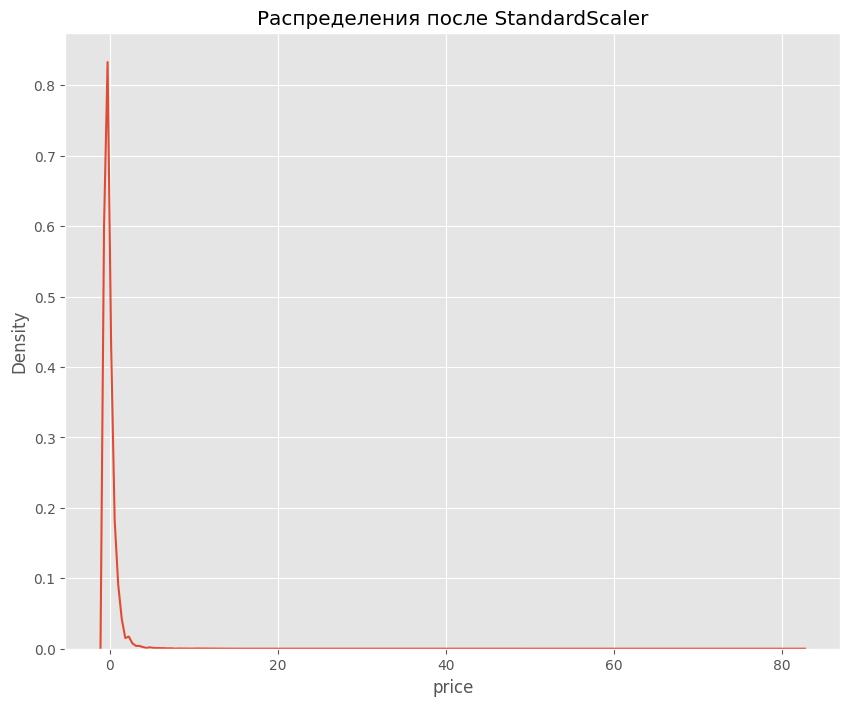

In [51]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
data_binencoded_2_s = s_scaler.fit_transform(data_binencoded_2['price'].values.reshape(-1, 1))

# Преобразуем только столбец 'price'
# Для этого нужно передать его как двумерный массив с помощью .values.reshape(-1, 1)
data_binencoded_2_s = pd.DataFrame(data_binencoded_2_s, columns=['price'])


fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(data_binencoded_2_s['price'], ax=ax1)

display(round(data_binencoded_2_s['price'][129968],2))

### Задание 7.3
1 point possible (graded)
Какие из признаков имеют самую сильную корреляционную связь?
price и points
price и price_round
taster_name_1 и taster_name_2
is_italy и is_france


Ответ: price и price_round


In [56]:
data_binencoded_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unnamed: 0                      129971 non-null  int64         
 1   country                         129908 non-null  object        
 2   description                     129971 non-null  object        
 3   designation                     129971 non-null  object        
 4   points                          129971 non-null  int64         
 5   price                           129971 non-null  float64       
 6   province                        129908 non-null  object        
 7   region_1                        129971 non-null  object        
 8   taster_name                     129971 non-null  object        
 9   taster_twitter_handle           129971 non-null  object        
 10  title                           129971 non-null  object 

In [60]:
display(data_binencoded_2['price'].corr(data_binencoded_2['points']))
display(data_binencoded_2['price'].corr(data_binencoded_2['price_round']))

display(data_binencoded_2['is_italy'].corr(data_binencoded_2['is_france']))

0.40213688263716063

0.9999972843086643

-0.19036086974079058

### Задание 7.4 (Самопроверка)
0 points possible (ungraded)
Проведите корреляционный анализ всего набора данных и отберите только необходимые признаки для предсказания рейтинга вина.

❗️ Удалять признак рейтинг — points нельзя!

❗️ Для простоты вычислений можете использовать только корреляцию Пирсона.


# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

<Axes: >

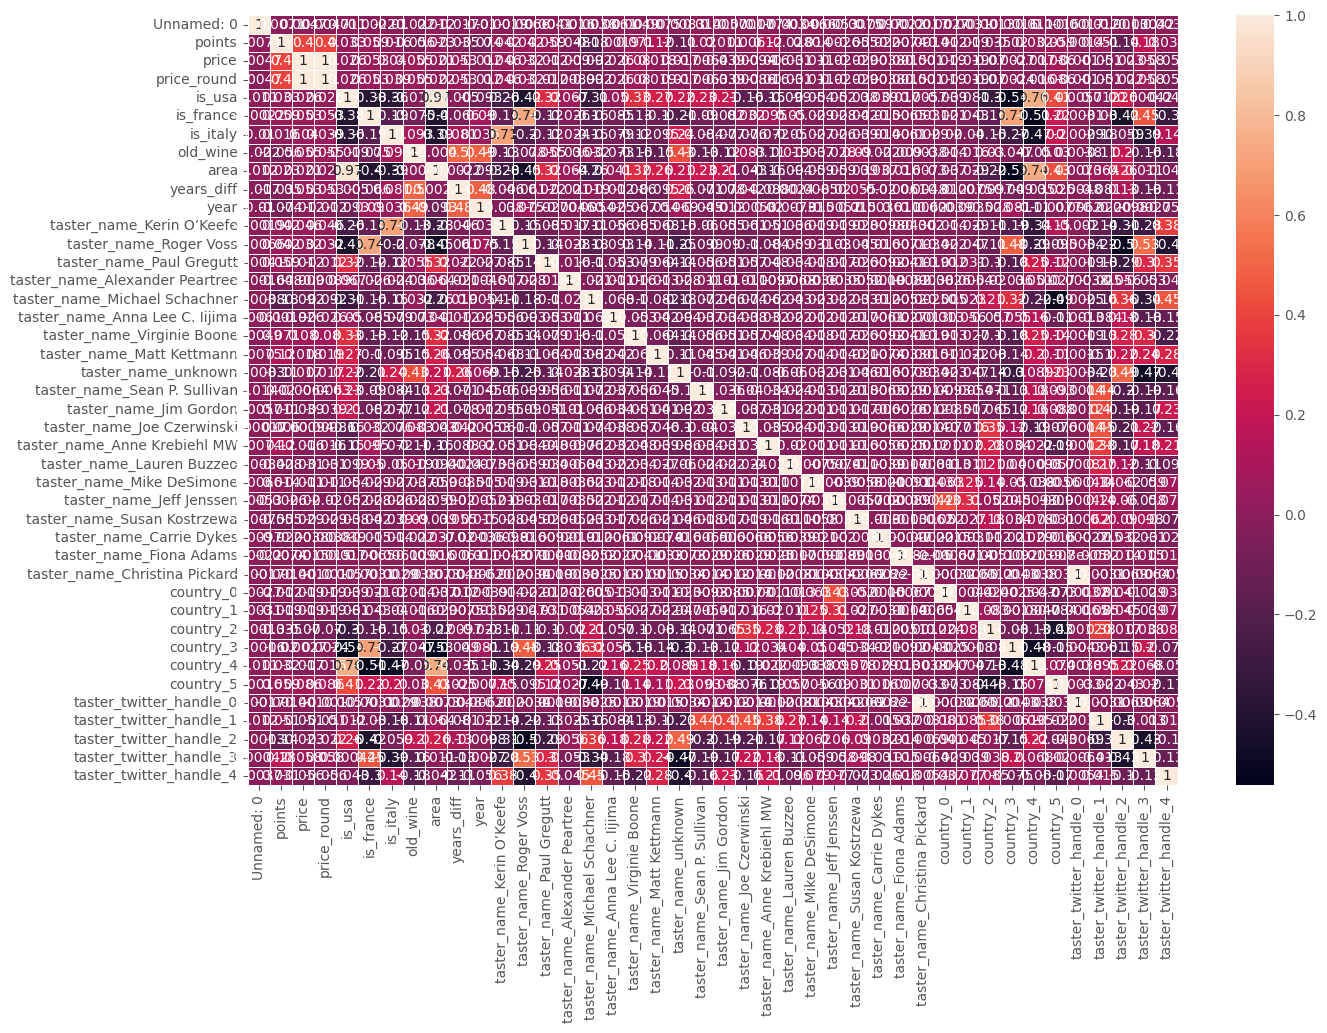

In [61]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_binencoded_2.corr(method = 'pearson', numeric_only = True), annot=True, linewidths=.5, ax=ax)

In [ ]:
# Удалим самые сильно скоррелированные пары
data_binencoded_2 = data_binencoded_2.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)



<Axes: >

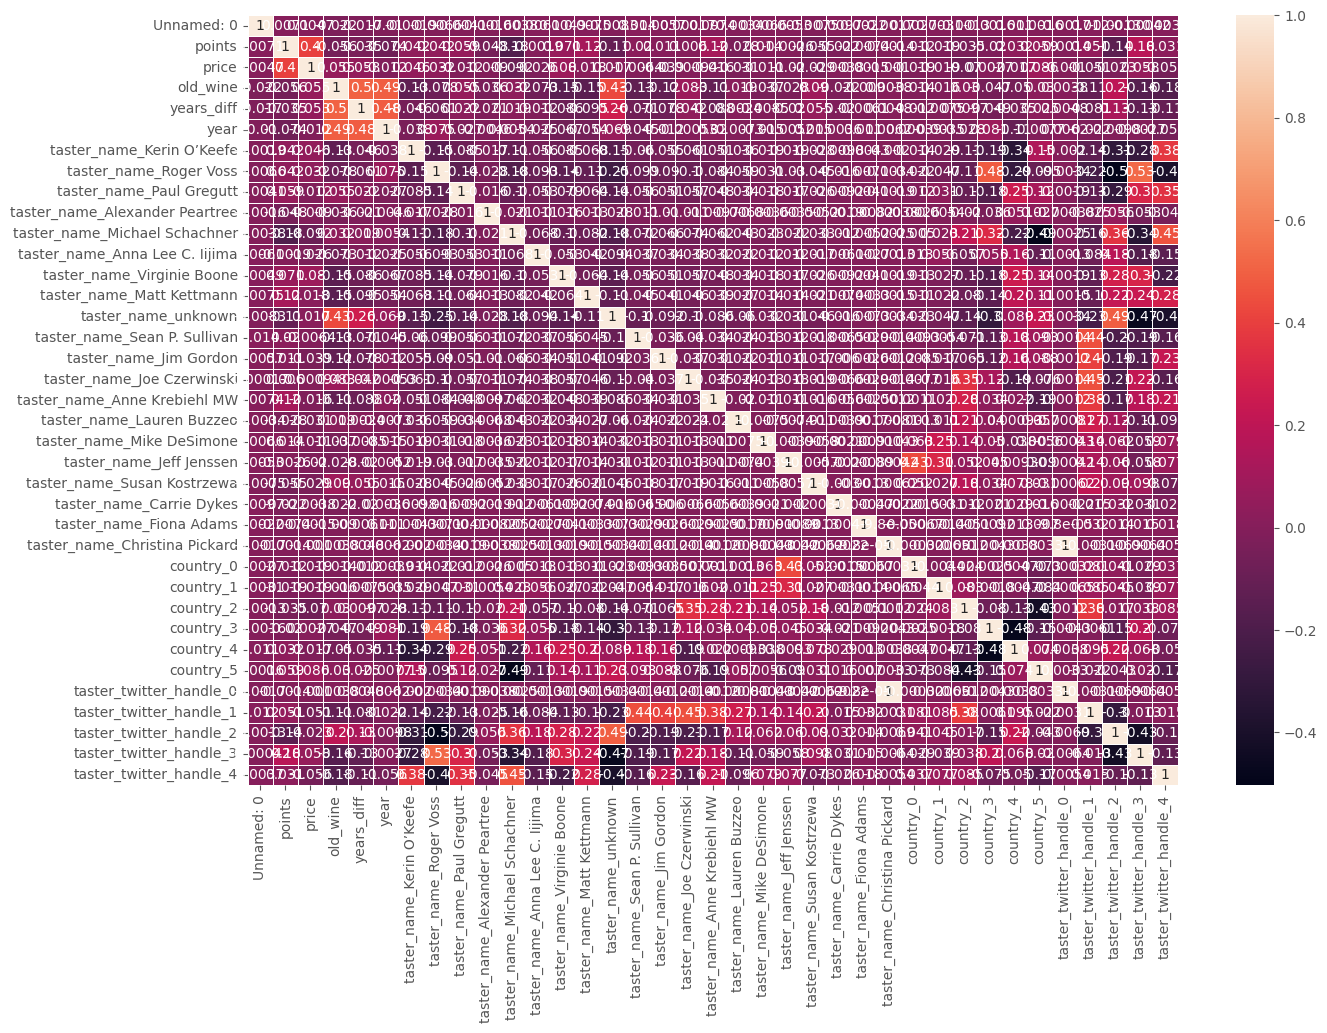

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data_binencoded_2.corr(method = 'pearson', numeric_only = True), annot=True, linewidths=.5, ax=ax)

Эталонный ответ

# Построим график корреляции всех величин. Для простоты воспользуемся корреляцией Пирсона.# работа с визуализациейimportmatplotlib.pyplotaspltimportseabornassns

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

# Удалим самые сильно скоррелированные пары
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

# Проверяем, что сильно скоррелированных признаков не осталось
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)